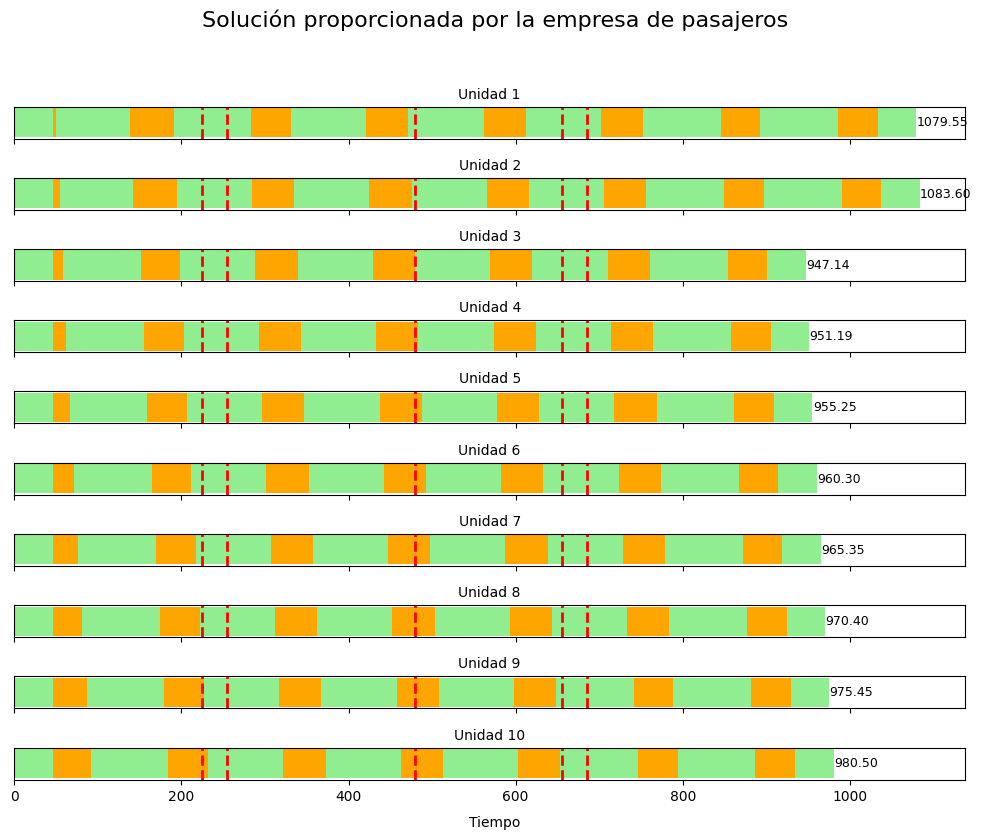

In [1]:
import src.DataProcessing.read_data as rd
import src.DataProcessing.transform_data as td
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.DataProcessing.read_data import lectura_alimentadora_norte

ruta_excel = '../alimentadores_norte_1/San-Juan.xlsx'
ruta="Ordinario"
base = lectura_alimentadora_norte(ruta_excel,ruta)


base['ANDEN_MINUTOS'] = base['TIEMPO EN ANDÉN'].apply(td.hora_a_minutos)
base['TIEMPO_VIAJE'] = base['HORA_LLEGADA'] - base['HORA_SALIDA']

# Valor umbral para cambiar de color
valor_umbral = 100

# Obtener las unidades únicas
unidades = base['COD. OP.'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales
lineas_verticales = [225, 255, 480, 670-15, 670+15]

resultados = []
contadorAux = 1
for i, unidad in enumerate(unidades):
    base_unidad = base[base['COD. OP.'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in base_unidad.iterrows():
        if not np.isnan(row['ANDEN_MINUTOS']):
            Type.append('A1')
            Time.append(row['ANDEN_MINUTOS'])
            # Asignar color según el valor del tiempo en andén
            if row['ANDEN_MINUTOS'] <= valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    if contadorAux<= 15:
        resultados.append(data)
    
    contadorAux += 1
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Solución proporcionada por la empresa de pasajeros', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
